<a href="https://colab.research.google.com/github/chinanuj/Predicting-Taxi-Demand-using-Time-Series-Analysis/blob/main/DLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install fastparquet

In [7]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from torch.utils.data import DataLoader,TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import pickle

In [8]:
df = pd.read_parquet('/content/yellow_tripdata_2025-01.parquet', engine='fastparquet')

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [10]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (3475226, 19)


In [11]:
print(df.dtypes)

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object


In [12]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          540149
trip_distance                 0
RatecodeID               540149
store_and_fwd_flag       540149
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     540149
Airport_fee              540149
dtype: int64


In [13]:
print(df.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  3.475226e+06                     3475226                     3475226   
mean   1.785428e+00  2025-01-17 11:02:55.910964  2025-01-17 11:17:56.997901   
min    1.000000e+00         2024-12-31 20:47:55         2024-12-18 07:52:40   
25%    2.000000e+00         2025-01-10 07:59:01  2025-01-10 08:15:29.500000   
50%    2.000000e+00         2025-01-17 15:41:33         2025-01-17 15:59:34   
75%    2.000000e+00         2025-01-24 19:34:06         2025-01-24 19:48:31   
max    7.000000e+00         2025-02-01 00:00:44         2025-02-01 23:44:11   
std    4.263282e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.935077e+06   3.475226e+06  2.935077e+06  3.475226e+06   
mean      1.297859e+00   5.855126e+00  2.482535e+00  1.651916e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [14]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [15]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [16]:
print(f"Pickup time range: {df['tpep_pickup_datetime'].min()} to {df['tpep_pickup_datetime'].max()}")
print(f"Dropoff time range: {df['tpep_dropoff_datetime'].min()} to {df['tpep_dropoff_datetime'].max()}")

Pickup time range: 2024-12-31 20:47:55 to 2025-02-01 00:00:44
Dropoff time range: 2024-12-18 07:52:40 to 2025-02-01 23:44:11


In [17]:
(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).describe()

,0
count,3475226
mean,0 days 00:15:01.086937
std,0 days 00:38:42.814931
min,-36 days +06:07:41
25%,0 days 00:07:17
50%,0 days 00:11:42
75%,0 days 00:18:20
max,3 days 21:46:19


In [18]:
# Drop exact-zero-duration trips
df = df[df['tpep_pickup_datetime'] != df['tpep_dropoff_datetime']]


In [19]:
# now we have no cancelled rides because we dont want
df[df['tpep_pickup_datetime'] == df['tpep_dropoff_datetime']]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


### Handline missing values

In [20]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
# View some rows with missing values
print(df[df.isnull().any(axis=1)].head())

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []


In [22]:
df[df['passenger_count'].isnull()]['tpep_pickup_datetime'].describe()


,tpep_pickup_datetime
count,0
mean,NaT
min,NaT
25%,NaT
50%,NaT
75%,NaT
max,NaT


In [23]:
# Check how many missing values exist in each column
print(df.isnull().sum())


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


In [24]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [25]:
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100) &
        (df['fare_amount'] > 0) & (df['total_amount'] > 0)]

In [26]:
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [27]:
df = df[(df['trip_duration_minutes'] >= 1) & (df['trip_duration_minutes'] <= 180)]

In [28]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration_minutes
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,8.350000
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,2.550000
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,1.950000
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,5.566667
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,3.533333


### Extracting temporal features to capture patterns



In [29]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['pickup_is_weekend'] = df['pickup_weekday'].isin([5, 6]).astype(int)

In [30]:
df[['pickup_hour', 'pickup_weekday', 'pickup_is_weekend']].describe()

,pickup_hour,pickup_weekday,pickup_is_weekend
count,3.241685e+06,3.241685e+06,3.241685e+06
mean,1.431593e+01,3.050171e+00,2.552145e-01
std,5.781785e+00,1.845900e+00,4.359818e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,2.000000e+00,0.000000e+00
50%,1.500000e+01,3.000000e+00,0.000000e+00
75%,1.900000e+01,5.000000e+00,1.000000e+00
max,2.300000e+01,6.000000e+00,1.000000e+00


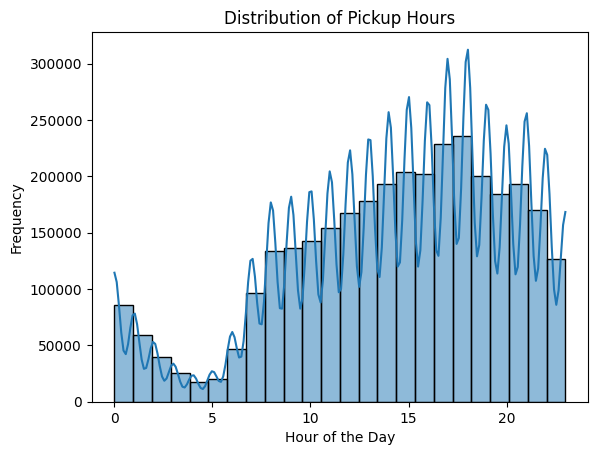

In [31]:
sns.histplot(df['pickup_hour'], bins=24, kde=True)
plt.title('Distribution of Pickup Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

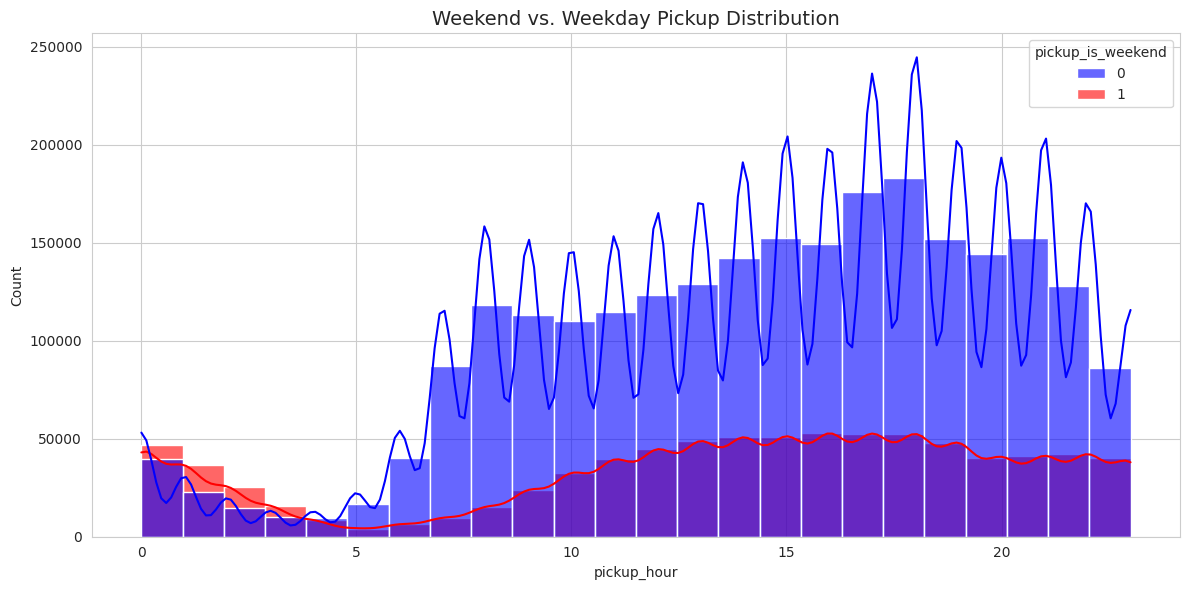

In [32]:
# Set plot style
sns.set_style("whitegrid")

# Create a single plot
fig, ax = plt.subplots(figsize=(12, 6))  # Use ax instead of axes[0]

# Weekend vs. Weekday Pickup Distribution
sns.histplot(data=df, x='pickup_hour', hue='pickup_is_weekend', bins=24, kde=True, ax=ax,
             palette=['blue', 'red'], alpha=0.6)

# Set title
ax.set_title("Weekend vs. Weekday Pickup Distribution", fontsize=14)

# Adjust layout and show
plt.tight_layout()
plt.show()

In [33]:
df['time_category'] = pd.cut(
    df['pickup_hour'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)'],
    include_lowest=True
)

### Adding cyclical encoding for time features to capture periodicity


In [34]:
df['hour_sin'] = np.sin(2 * np.pi * df['pickup_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['pickup_hour'] / 24)
df['weekday_sin'] = np.sin(2 * np.pi * df['pickup_weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['pickup_weekday'] / 7)

In [35]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_is_weekend,time_category,hour_sin,hour_cos,weekday_sin,weekday_cos
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


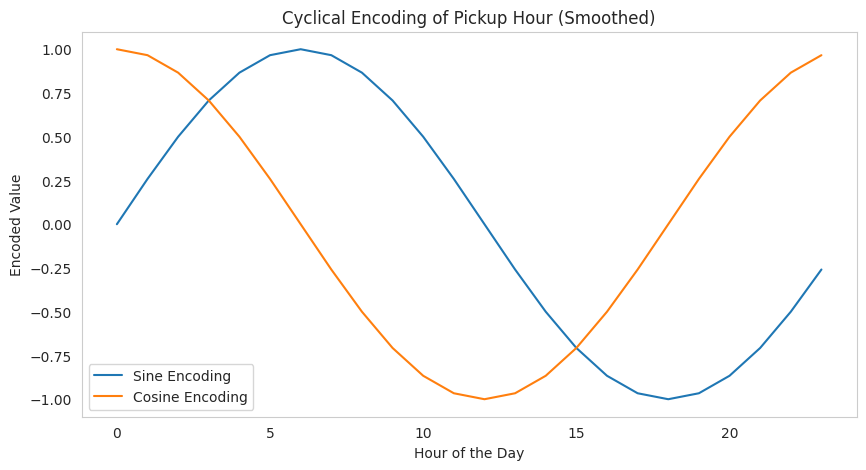

In [36]:
# Sort by pickup_hour for better visualization
df_sorted = df.sort_values(by='pickup_hour')

plt.figure(figsize=(10, 5))
plt.plot(df_sorted['pickup_hour'], df_sorted['hour_sin'], label='Sine Encoding')
plt.plot(df_sorted['pickup_hour'], df_sorted['hour_cos'], label='Cosine Encoding')
plt.xlabel('Hour of the Day')
plt.ylabel('Encoded Value')
plt.title('Cyclical Encoding of Pickup Hour (Smoothed)')
plt.legend()
plt.grid()
plt.show()

### Creating demand dataset by counting trips per location per hour

In [37]:
df['pickup_hour_rounded'] = df['tpep_pickup_datetime'].dt.floor('h')
demand_df = df.groupby(['PULocationID', 'pickup_hour_rounded']).size().reset_index(name='demand')
demand_df.sort_values(['PULocationID', 'pickup_hour_rounded'], inplace=True)

In [38]:
demand_df

,PULocationID,pickup_hour_rounded,demand
0,1,2025-01-01 13:00:00,1
1,1,2025-01-01 14:00:00,1
2,1,2025-01-02 16:00:00,1
3,1,2025-01-02 20:00:00,1
4,1,2025-01-03 12:00:00,1
...,...,...,...
91564,265,2025-01-31 09:00:00,2
91565,265,2025-01-31 13:00:00,1
91566,265,2025-01-31 14:00:00,1
91567,265,2025-01-31 16:00:00,1


### EDA (Exploratory data analysis)

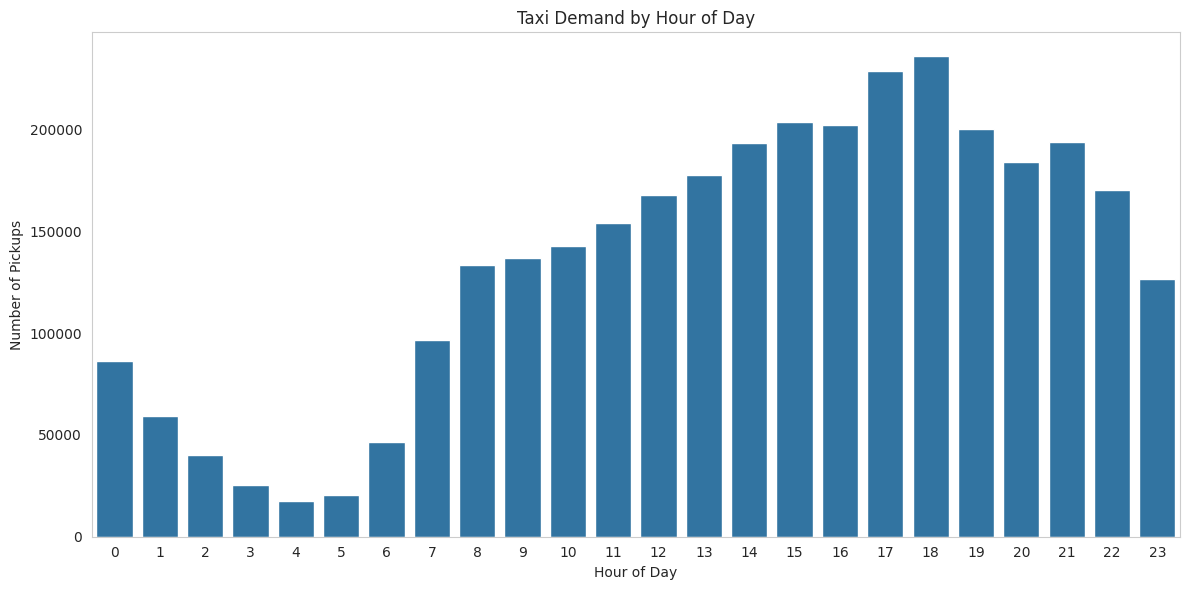

In [39]:
# Hourly demand patterns

hourly_demand = df.groupby('pickup_hour').size()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values)
plt.title('Taxi Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

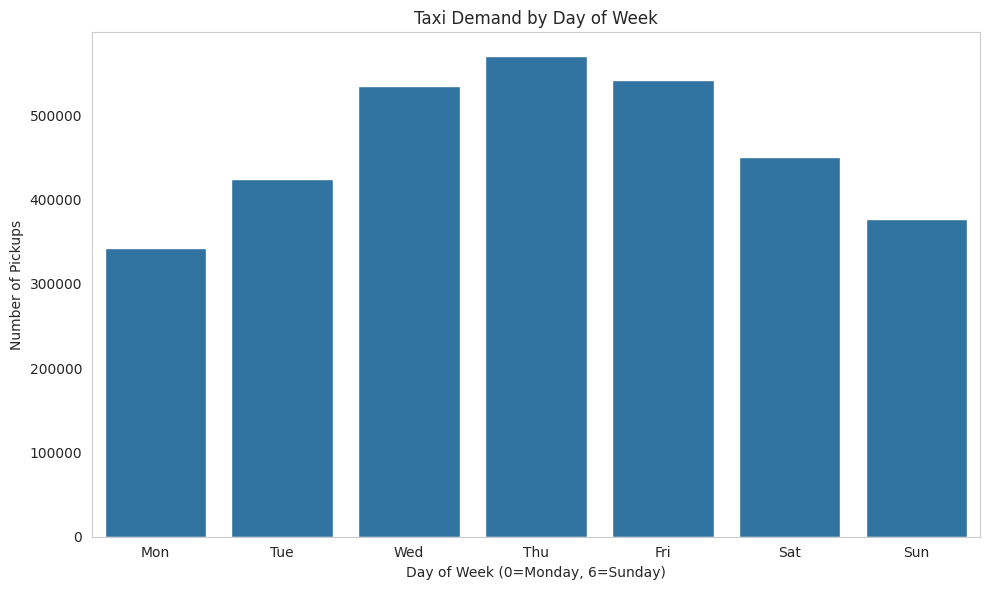

In [40]:
# Daily demand patterns

daily_demand = df.groupby('pickup_weekday').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_demand.index, y=daily_demand.values)
plt.title('Taxi Demand by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

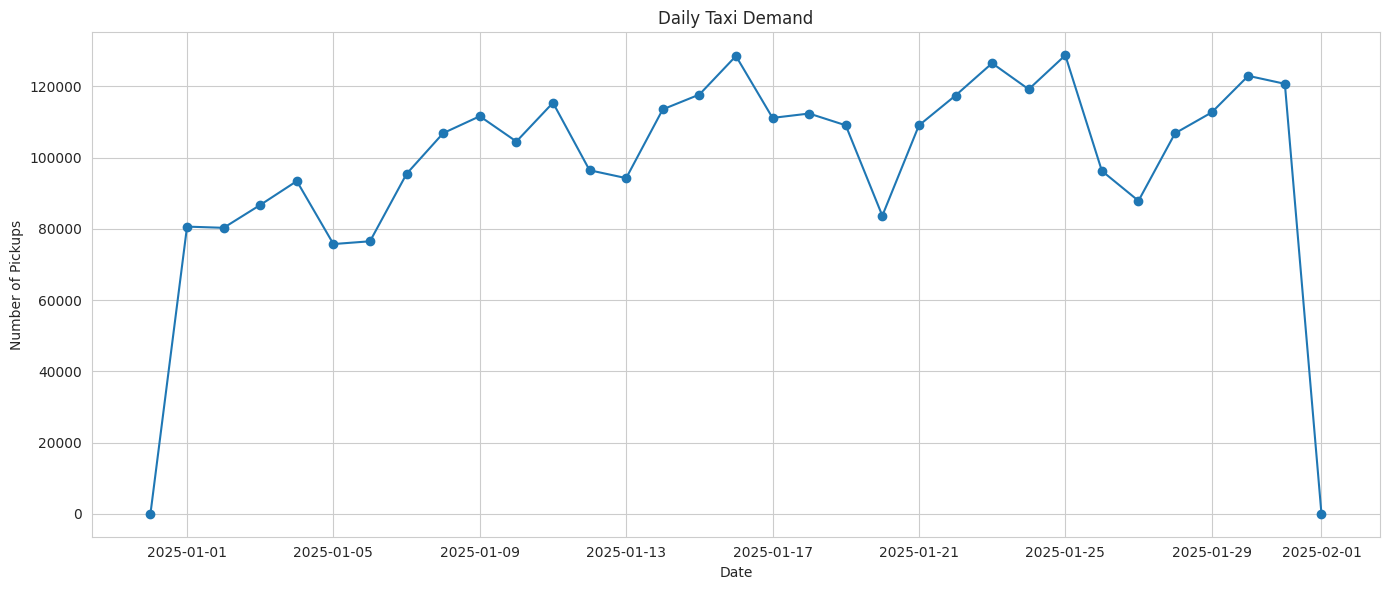

In [41]:
# Demand over month

day_demand = df.groupby(df['tpep_pickup_datetime'].dt.date).size()
plt.figure(figsize=(14, 6))
plt.plot(day_demand.index, day_demand.values, marker='o')
plt.title('Daily Taxi Demand')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.tight_layout()
plt.show()

### Taking look at some spatial patterns

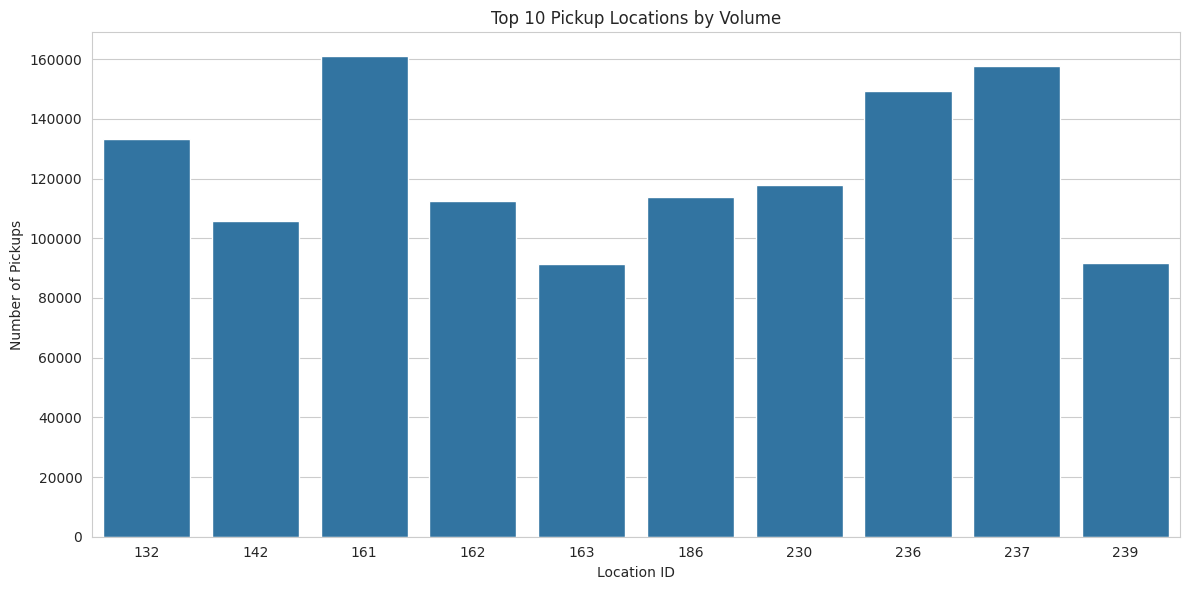

In [42]:
# Top pickup spots/locations
top_pickup_locations = df['PULocationID'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_locations.index, y=top_pickup_locations.values)
plt.title('Top 10 Pickup Locations by Volume')
plt.xlabel('Location ID')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()

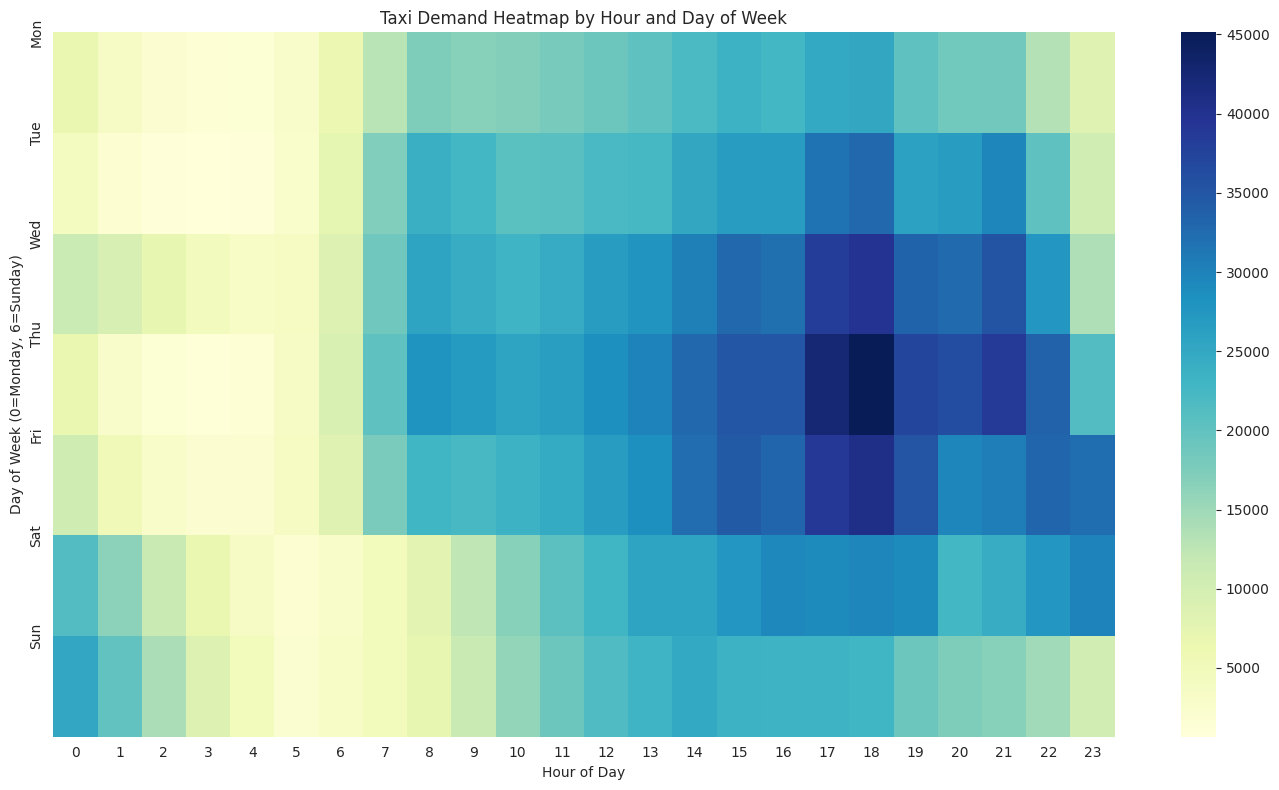

In [43]:
# Using a heatmap to depict hourly and weekday demand

demand_heatmap = df.groupby(['pickup_weekday', 'pickup_hour']).size().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(demand_heatmap, cmap='YlGnBu', annot=False)
plt.title('Taxi Demand Heatmap by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

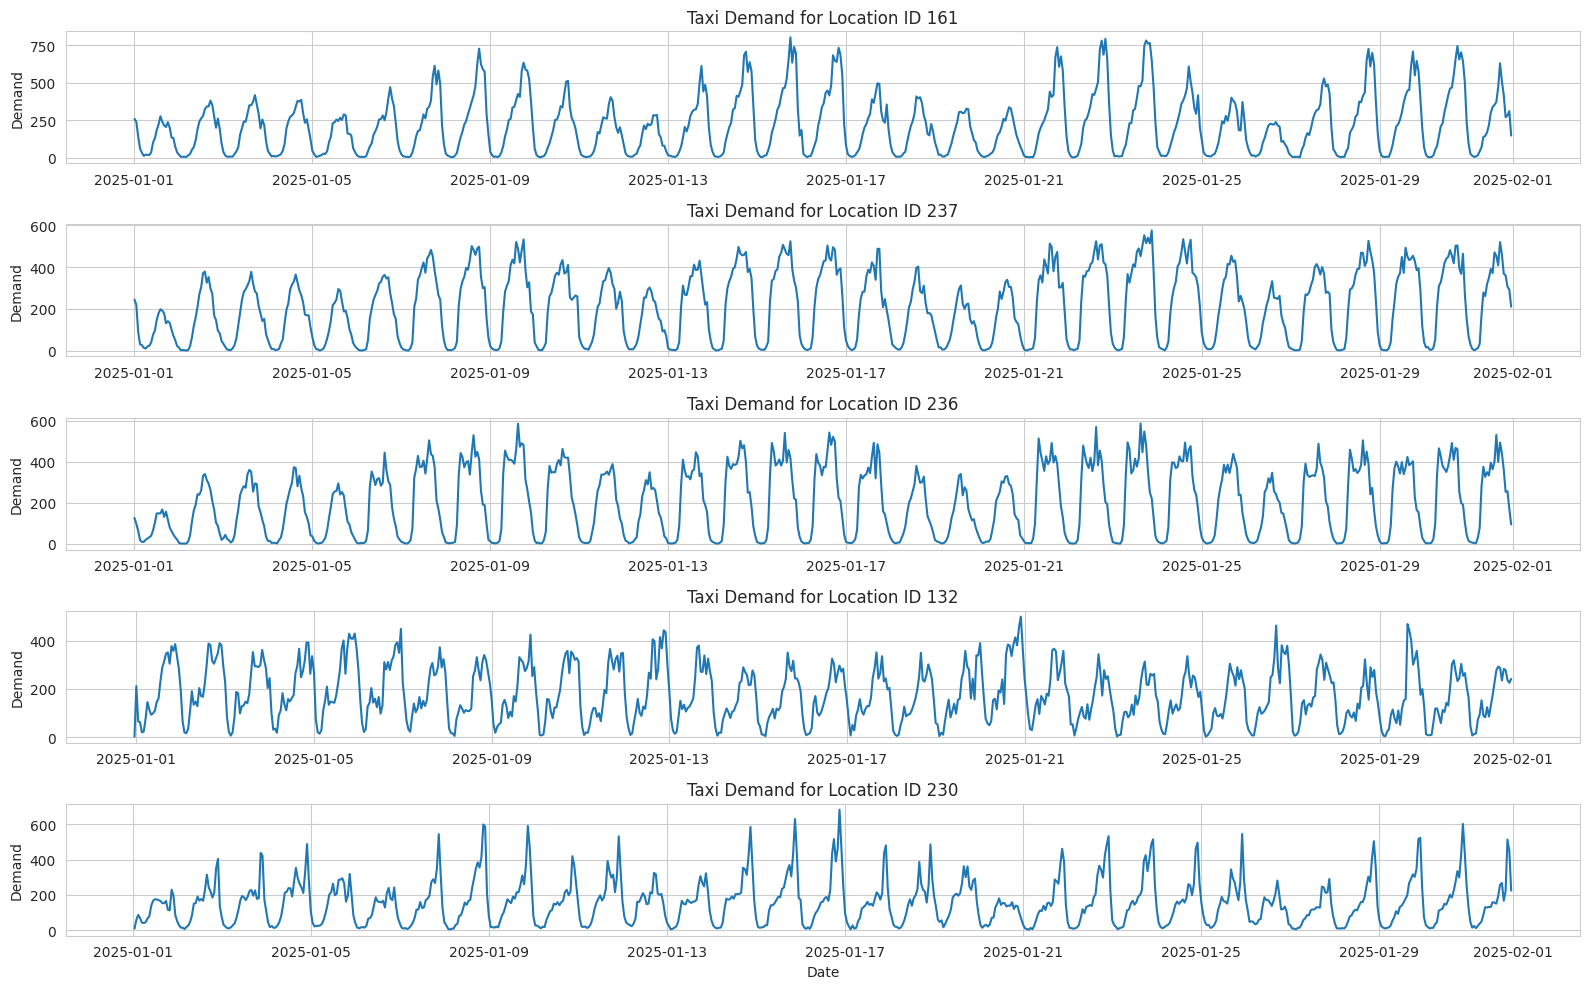

In [44]:
# Visualizing time seies for top 5 busiest locations

top_locations = df['PULocationID'].value_counts().nlargest(5).index

plt.figure(figsize=(16, 10))
for i, location in enumerate(top_locations, 1):
    location_demand = demand_df[demand_df['PULocationID'] == location]
    plt.subplot(5, 1, i)
    plt.plot(location_demand['pickup_hour_rounded'], location_demand['demand'])
    plt.title(f'Taxi Demand for Location ID {location}')
    plt.ylabel('Demand')
    if i == 5:
        plt.xlabel('Date')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Creating lag features meaning adding past demand values as predictors

def create_lag_features(df, group_col, time_col, target_col, lag_hours=[1, 2, 3, 24, 48, 168]):
    result_df = df.copy()
    result_df = result_df.sort_values([group_col, time_col])

    for lag in lag_hours:
        result_df[f'lag_{lag}h'] = result_df.groupby(group_col)[target_col].shift(lag)

    return result_df

In [46]:
demand_with_lags = create_lag_features(
    demand_df,
    group_col='PULocationID',
    time_col='pickup_hour_rounded',
    target_col='demand'
)

In [47]:
demand_with_lags = demand_with_lags.dropna()

In [48]:
# Adding rolling window stats like moving average and standard deviation

def add_rolling_features(df, group_col, target_col, windows=[3, 6, 12, 24]):
    result_df = df.copy()

    for window in windows:
        result_df[f'rolling_mean_{window}h'] = result_df.groupby(group_col)[target_col].transform(
            lambda x: x.rolling(window, min_periods=1).mean()
        )

        result_df[f'rolling_std_{window}h'] = result_df.groupby(group_col)[target_col].transform(
            lambda x: x.rolling(window, min_periods=1).std()
        )

    return result_df

In [49]:
demand_with_features = add_rolling_features(
    demand_with_lags,
    group_col='PULocationID',
    target_col='demand'
)

In [50]:
# Adding temporal features like hour of day, day of week, etc.

def add_temporal_features(df, time_col):
    result_df = df.copy()

    result_df['hour'] = result_df[time_col].dt.hour
    result_df['day'] = result_df[time_col].dt.day
    result_df['weekday'] = result_df[time_col].dt.weekday
    result_df['month'] = result_df[time_col].dt.month
    result_df['is_weekend'] = result_df['weekday'].isin([5, 6]).astype(int)

    result_df['hour_sin'] = np.sin(2 * np.pi * result_df['hour'] / 24)
    result_df['hour_cos'] = np.cos(2 * np.pi * result_df['hour'] / 24)
    result_df['weekday_sin'] = np.sin(2 * np.pi * result_df['weekday'] / 7)
    result_df['weekday_cos'] = np.cos(2 * np.pi * result_df['weekday'] / 7)

    return result_df

In [51]:
final_demand_df = add_temporal_features(
    demand_with_features,
    time_col='pickup_hour_rounded'
)

### Train test split

In [52]:
cutoff_date = final_demand_df['pickup_hour_rounded'].max() - pd.Timedelta(days=7)

train_df = final_demand_df[final_demand_df['pickup_hour_rounded'] <= cutoff_date]
test_df = final_demand_df[final_demand_df['pickup_hour_rounded'] > cutoff_date]

print(f"Training set size: {train_df.shape}")
print(f"Testing set size: {test_df.shape}")

Training set size: (36107, 26)
Testing set size: (19533, 26)


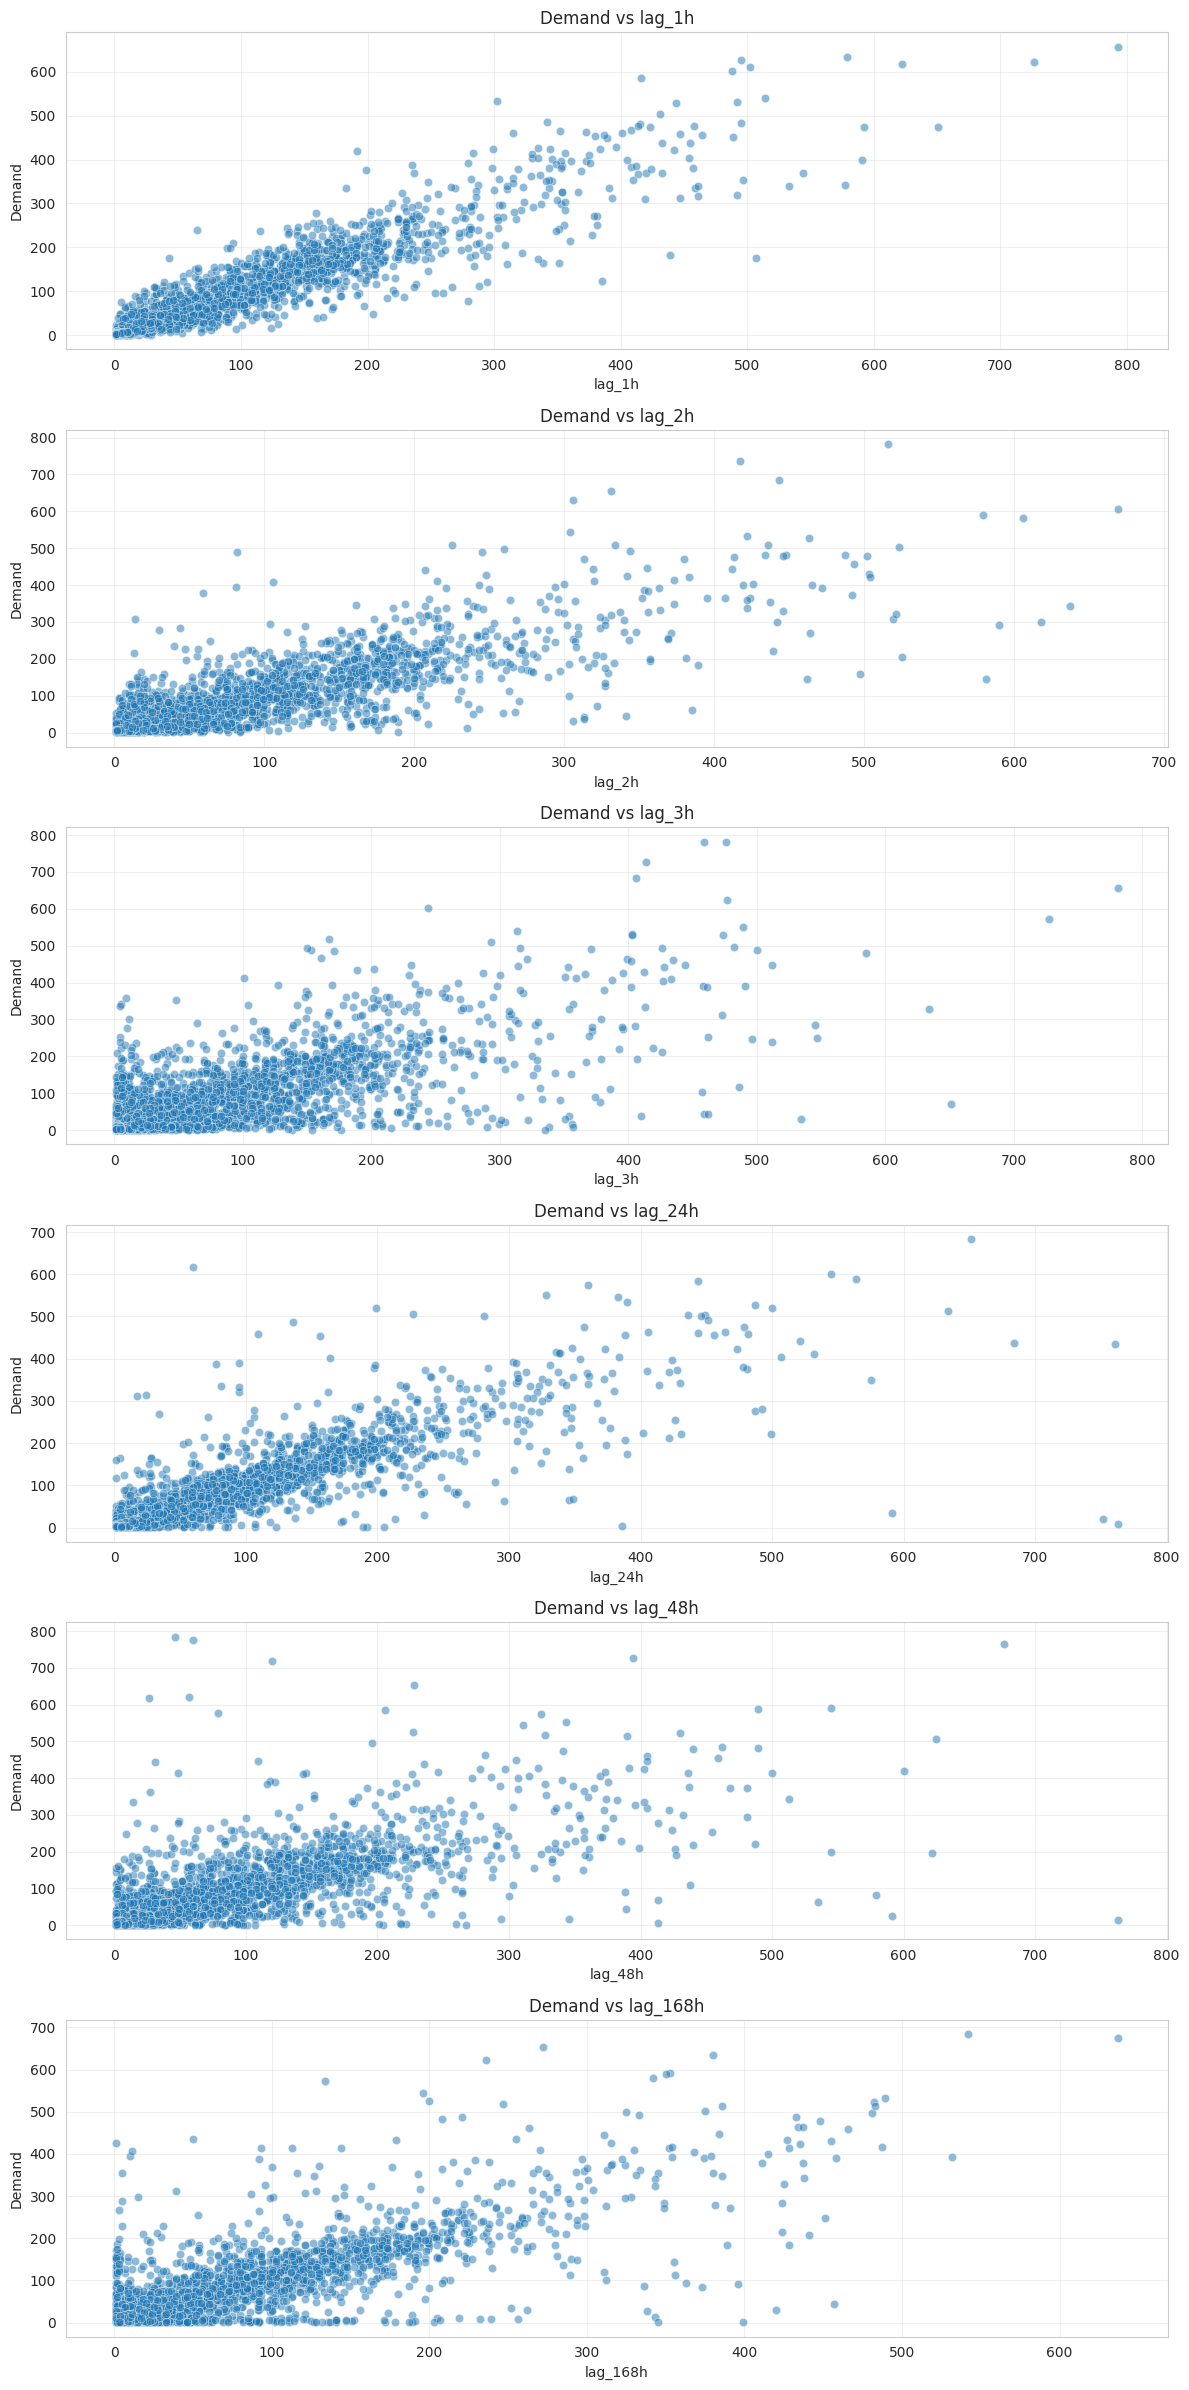

In [53]:
lag_cols = [col for col in train_df.columns if 'lag_' in col]

if lag_cols:
    fig, axes = plt.subplots(len(lag_cols), 1, figsize=(12, 4*len(lag_cols)))

    for i, lag_col in enumerate(lag_cols):
        sns.scatterplot(x=lag_col, y='demand', data=train_df.sample(5000), alpha=0.5, ax=axes[i])
        axes[i].set_title(f'Demand vs {lag_col}', fontsize=12)
        axes[i].set_xlabel(lag_col, fontsize=10)
        axes[i].set_ylabel('Demand', fontsize=10)
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

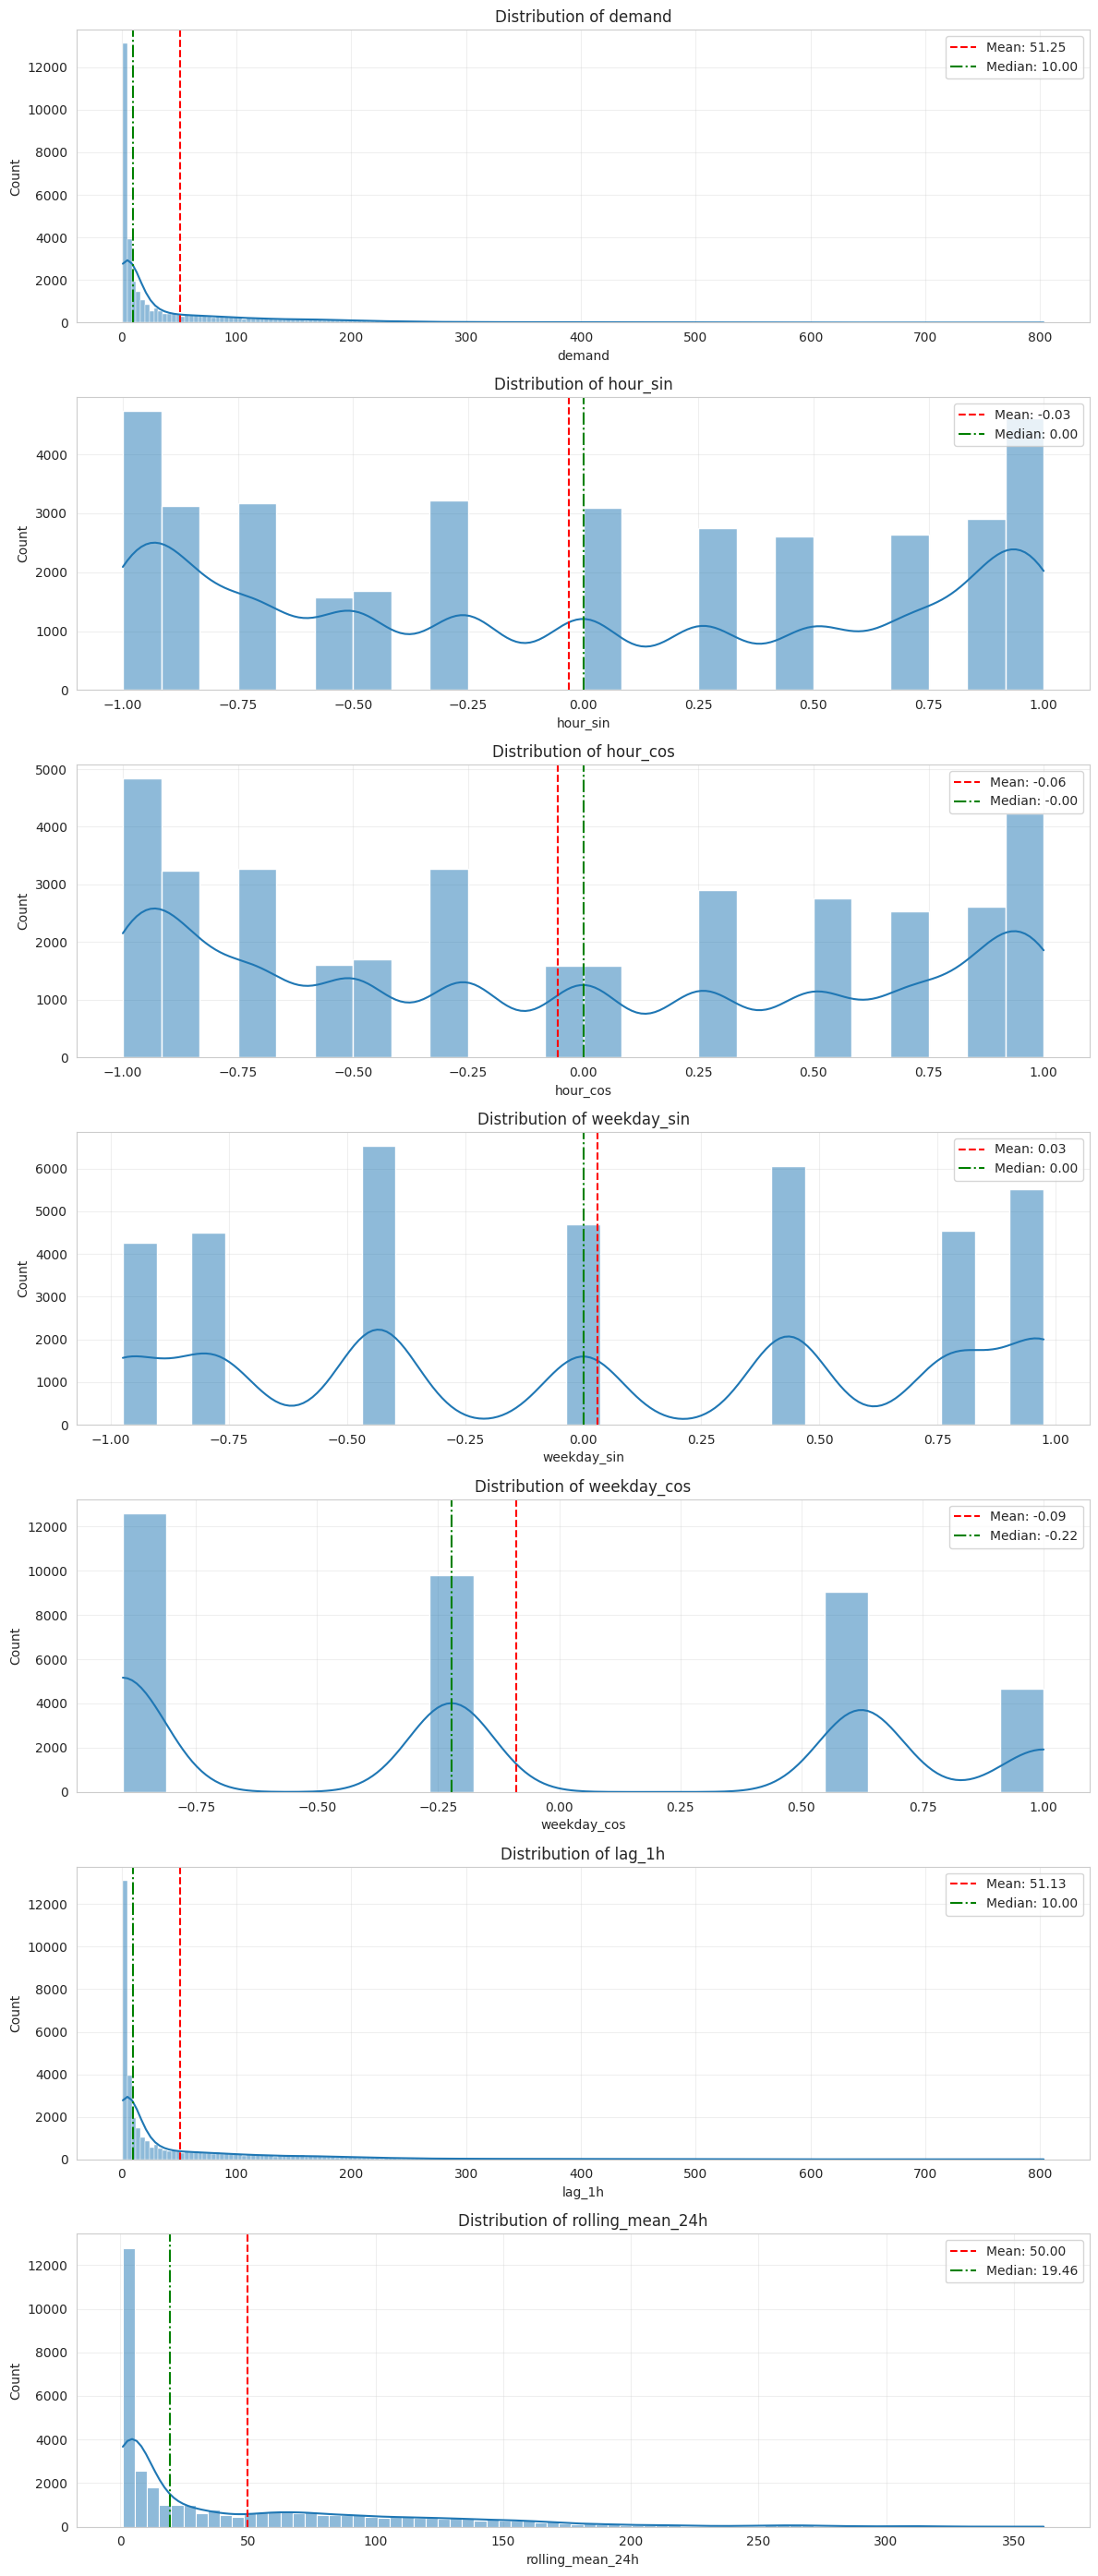

In [54]:
key_features = ['demand', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos']
if 'lag_1h' in train_df.columns:
    key_features.append('lag_1h')
if 'rolling_mean_24h' in train_df.columns:
    key_features.append('rolling_mean_24h')

fig, axes = plt.subplots(len(key_features), 1, figsize=(12, 4*len(key_features)))

for i, feature in enumerate(key_features):
    sns.histplot(train_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)
    axes[i].grid(True, alpha=0.3)

    mean_val = train_df[feature].mean()
    median_val = train_df[feature].median()
    axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [55]:
# Identify numerical columns to scale (exclude datetime and categorical)
numerical_cols = [col for col in train_df.columns if
                 train_df[col].dtype in ['int64', 'float64'] and
                 col not in ['PULocationID', 'demand']]

In [56]:
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

<ipython-input-56-9eed5a2a094e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
<ipython-input-56-9eed5a2a094e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])


In [57]:
print(train_df.head())

     PULocationID pickup_hour_rounded  demand    lag_1h    lag_2h    lag_3h  \
323             4 2025-01-09 12:00:00       6 -0.590517 -0.578286 -0.507125   
324             4 2025-01-09 14:00:00       1 -0.531614 -0.590088 -0.578039   
325             4 2025-01-09 15:00:00       4 -0.590517 -0.531080 -0.589858   
326             4 2025-01-09 16:00:00       1 -0.555175 -0.590088 -0.530763   
327             4 2025-01-09 17:00:00       1 -0.590517 -0.554683 -0.589858   

      lag_24h   lag_48h  lag_168h  rolling_mean_3h  ...  rolling_std_24h  \
323 -0.575362 -0.585686 -0.268463        -0.547085  ...              NaN   
324 -0.539809 -0.561382  0.077109        -0.577410  ...        -0.700524   
325 -0.539809 -0.561382  0.025913        -0.575388  ...        -0.722615   
326 -0.575362 -0.464165 -0.178870        -0.595605  ...        -0.724071   
327 -0.575362 -0.512774 -0.255664        -0.595605  ...        -0.727265   

     hour  day  weekday  month  is_weekend  hour_sin  hour_cos  week

In [58]:
# Re-apply NaN fix to be certain
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

feature_cols = [
    'lag_1h', 'lag_2h', 'lag_24h', 'lag_168h',
    'rolling_mean_3h', 'rolling_mean_24h', 'rolling_std_24h',
    'is_weekend', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos'
]

def create_sequences(data, features, target, seq_length=24):
    X, y = [], []
    for location in data['PULocationID'].unique():
        loc_data = data[data['PULocationID'] == location].sort_values('pickup_hour_rounded')
        if len(loc_data) >= seq_length + 1:
            loc_X = loc_data[features].values
            loc_y = loc_data[target].values
            for i in range(len(loc_data) - seq_length):
                X.append(loc_X[i:i+seq_length])
                y.append(loc_y[i+seq_length])
    X = np.array(X)
    y = np.array(y)
    return X, y

# Generate sequences
X_train, y_train = create_sequences(train_df, features=feature_cols, target='demand', seq_length=24)
X_test, y_test = create_sequences(test_df, features=feature_cols, target='demand', seq_length=24)

# Immediate NaN check
print("NaNs in X_train immediately after creation:", np.isnan(X_train).any())
print("NaNs in y_train immediately after creation:", np.isnan(y_train).any())
print("NaNs in X_test immediately after creation:", np.isnan(X_test).any())
print("NaNs in y_test immediately after creation:", np.isnan(y_test).any())

# Print sample to inspect
print("X_train[0, :3, :]:")
print(X_train[0, :3, :])
print("X_test[0, :3, :]:")
print(X_test[0, :3, :])

NaNs in X_train immediately after creation: False
NaNs in y_train immediately after creation: False
NaNs in X_test immediately after creation: False
NaNs in y_test immediately after creation: False
X_train[0, :3, :]:
[[-0.59051717 -0.57828597 -0.57536216 -0.26846332 -0.54708485 -0.71570647
   0.         -0.56580434  0.04400538 -1.34612571  0.58646839 -1.13074958]
 [-0.53161426 -0.59008752 -0.5398089   0.07710942 -0.57740993 -0.75636765
  -0.70052351 -0.56580434 -0.66033998 -1.1551192   0.58646839 -1.13074958]
 [-0.59051717 -0.53107975 -0.5398089   0.02591346 -0.57538826 -0.7536569
  -0.72261534 -0.56580434 -0.95208938 -0.92855019  0.58646839 -1.13074958]]
X_test[0, :3, :]:
[[ 0.32836816  0.05899797 -0.45685128 -0.52444312  0.3262776  -0.5449295
  -0.23121424  1.76739543  0.40860137  1.45667897 -1.4567879  -0.18611988]
 [ 0.56397978  0.33043372 -0.48055346 -0.51164413  0.43949125 -0.4947807
  -0.15615219  1.76739543  0.74835074  1.31425174 -1.4567879  -0.18611988]
 [ 0.38727106  0.56646

In [59]:
if np.isnan(X_train).any():
    nan_locs = np.where(np.isnan(X_train))
    print("NaN locations in X_train (sample, timestep, feature):", list(zip(nan_locs[0], nan_locs[1], nan_locs[2]))[:5])
if np.isnan(X_test).any():
    nan_locs = np.where(np.isnan(X_test))
    print("NaN locations in X_test (sample, timestep, feature):", list(zip(nan_locs[0], nan_locs[1], nan_locs[2]))[:5])

In [60]:
for df in [train_df, test_df]:
    df['rolling_mean_3h'] = df.groupby('PULocationID')['demand'].transform(lambda x: x.rolling(3, min_periods=1).mean())
    df['rolling_mean_24h'] = df.groupby('PULocationID')['demand'].transform(lambda x: x.rolling(24, min_periods=1).mean())
    df['rolling_std_24h'] = df.groupby('PULocationID')['demand'].transform(lambda x: x.rolling(24, min_periods=1).std()).fillna(0)

In [61]:
X_test[:3]

array([[[ 0.32836816,  0.05899797, -0.45685128, -0.52444312,
          0.3262776 , -0.5449295 , -0.23121424,  1.76739543,
          0.40860137,  1.45667897, -1.4567879 , -0.18611988],
        [ 0.56397978,  0.33043372, -0.48055346, -0.51164413,
          0.43949125, -0.4947807 , -0.15615219,  1.76739543,
          0.74835074,  1.31425174, -1.4567879 , -0.18611988],
        [ 0.38727106,  0.5664648 , -0.5398089 , -0.38365423,
          0.26967078, -0.47309474, -0.15536282,  1.76739543,
          1.04010015,  1.08768273, -1.4567879 , -0.18611988],
        [-0.16641625,  0.38944149, -0.57536216, -0.52444312,
         -0.0901869 , -0.46767325, -0.15934179,  1.76739543,
          1.26396734,  0.79241226, -1.4567879 , -0.18611988],
        [-0.48449194, -0.16523157, -0.58721325, -0.52444312,
         -0.42578451, -0.46767325, -0.15934179,  1.76739543,
          1.40469613, -0.28942997, -1.4567879 , -0.18611988],
        [-0.59051717, -0.48387354, -0.55165999, -0.46044817,
         -0.5551715

In [62]:
print("X_test[0, :3, :]:")
print(X_test[0, :3, :])

X_test[0, :3, :]:
[[ 0.32836816  0.05899797 -0.45685128 -0.52444312  0.3262776  -0.5449295
  -0.23121424  1.76739543  0.40860137  1.45667897 -1.4567879  -0.18611988]
 [ 0.56397978  0.33043372 -0.48055346 -0.51164413  0.43949125 -0.4947807
  -0.15615219  1.76739543  0.74835074  1.31425174 -1.4567879  -0.18611988]
 [ 0.38727106  0.5664648  -0.5398089  -0.38365423  0.26967078 -0.47309474
  -0.15536282  1.76739543  1.04010015  1.08768273 -1.4567879  -0.18611988]]


In [63]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

train_size = int(0.8 * len(X_train_tensor))
X_train_split, y_train_split = X_train_tensor[:train_size], y_train_tensor[:train_size]
X_val_split, y_val_split = X_train_tensor[train_size:], y_train_tensor[train_size:]

train_dataset = TensorDataset(X_train_split, y_train_split)
val_dataset = TensorDataset(X_val_split, y_val_split)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
data_loaders = {
    'train_loader': train_loader,
    'val_loader': val_loader,
    'test_loader': test_loader
}

with open('lstm_gru_data.pkl', 'wb') as f:
    pickle.dump(data_loaders, f)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def train_and_evaluate(model, train_loader, val_loader, test_loader, epochs=50, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch).squeeze()
            loss = criterion(output, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                output = model(X_batch).squeeze()
                val_loss += criterion(output, y_batch).item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    test_loss = 0
    test_preds, test_targets = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch).squeeze()
            test_loss += criterion(output, y_batch).item()
            test_preds.extend(output.cpu().numpy())
            test_targets.extend(y_batch.cpu().numpy())
    test_loss /= len(test_loader)

    test_rmse = np.sqrt(test_loss)
    print(f"\n Test Loss: {test_loss:.4f} | RMSE: {test_rmse:.4f}")

    return train_losses, val_losses, test_loss, test_rmse

In [ ]:
input_size = 12
hidden_size = 100
num_layers = 3
output_size = 1
lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)

print("Training LSTM Model:")
train_losses, val_losses, test_loss, test_rmse = train_and_evaluate(lstm_model, train_loader, val_loader, test_loader)

Training LSTM Model:
Epoch 1/50 | Train Loss: 0.1908 | Val Loss: 0.3776
Epoch 2/50 | Train Loss: 0.0902 | Val Loss: 0.2077
Epoch 3/50 | Train Loss: 0.0805 | Val Loss: 0.2118
Epoch 4/50 | Train Loss: 0.0715 | Val Loss: 0.2018
Epoch 5/50 | Train Loss: 0.0657 | Val Loss: 0.2275
Epoch 6/50 | Train Loss: 0.0624 | Val Loss: 0.3026
Epoch 7/50 | Train Loss: 0.0596 | Val Loss: 0.3177
Epoch 8/50 | Train Loss: 0.0579 | Val Loss: 0.2411
Epoch 9/50 | Train Loss: 0.0576 | Val Loss: 0.2062
Epoch 10/50 | Train Loss: 0.0541 | Val Loss: 0.1989
Epoch 11/50 | Train Loss: 0.0528 | Val Loss: 0.2077
Epoch 12/50 | Train Loss: 0.0510 | Val Loss: 0.1935
Epoch 13/50 | Train Loss: 0.0492 | Val Loss: 0.1947
Epoch 14/50 | Train Loss: 0.0478 | Val Loss: 0.1728
Epoch 15/50 | Train Loss: 0.0461 | Val Loss: 0.2061
Epoch 16/50 | Train Loss: 0.0453 | Val Loss: 0.2064
Epoch 17/50 | Train Loss: 0.0437 | Val Loss: 0.1957
Epoch 18/50 | Train Loss: 0.0413 | Val Loss: 0.2017
Epoch 19/50 | Train Loss: 0.0407 | Val Loss: 0.1933


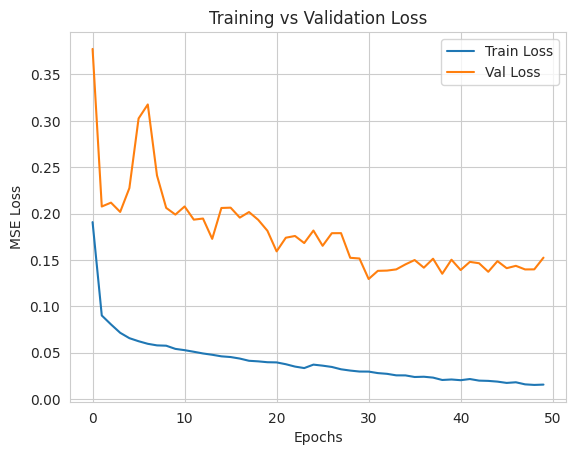

In [ ]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

Validation Loss: 0.1526


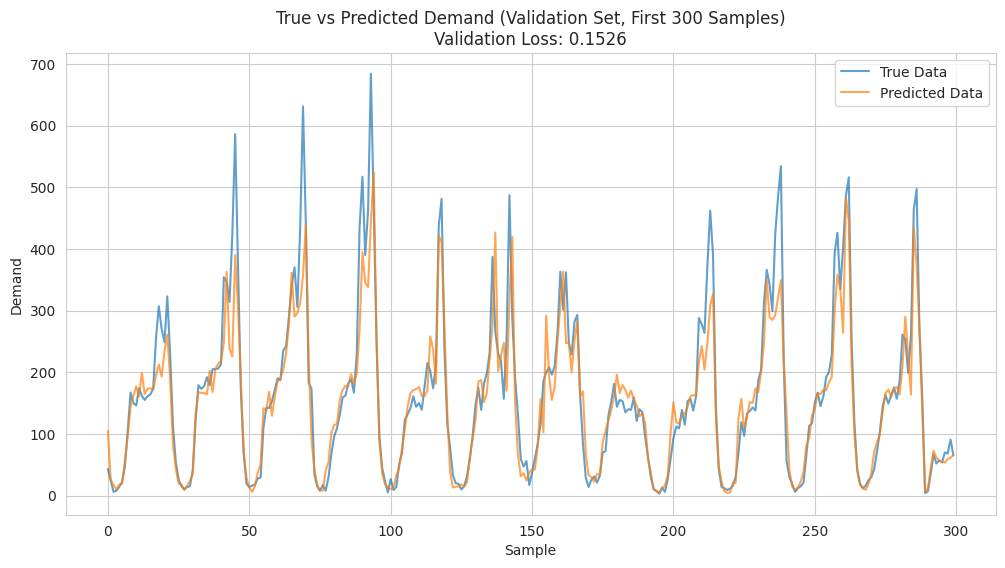

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lstm_model.eval()

criterion = nn.MSELoss()

test_preds = []
test_labels = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        batch_X = batch_X.to(device)
        preds = lstm_model(batch_X)
        test_preds.append(preds.cpu())
        test_labels.append(batch_y.cpu())

test_preds = torch.cat(test_preds, dim=0)
test_labels = torch.cat(test_labels, dim=0)

test_loss = criterion(test_preds, test_labels.unsqueeze(1))
print(f'Validation Loss: {test_loss.item():.4f}')

test_preds_np = scaler_y.inverse_transform(test_preds.numpy().reshape(-1, 1)).flatten()
test_labels_np = scaler_y.inverse_transform(test_labels.numpy().reshape(-1, 1)).flatten()

subset_size = 300
test_preds_subset = test_preds_np[:subset_size]
test_labels_subset = test_labels_np[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(range(len(test_labels_subset)), test_labels_subset, label='True Data', alpha=0.7)
plt.plot(range(len(test_preds_subset)), test_preds_subset, label='Predicted Data', alpha=0.7)
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Demand')
plt.title(f'True vs Predicted Demand (Validation Set, First {subset_size} Samples)\nValidation Loss: {test_loss.item():.4f}')
plt.show()

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
input_size = len(feature_cols)
hidden_size = 100
num_layers = 3
output_size = 1

gru_model = GRUModel(input_size, hidden_size, num_layers, output_size)

print("\nTraining GRU Model:")
gru_train_losses, gru_val_losses, gru_test_loss, gru_test_rmse = train_and_evaluate(
    gru_model, train_loader, val_loader, test_loader, epochs=50, lr=0.001
)


print("\nModel Comparison:")
print(f"GRU Test Loss: {gru_test_loss:.4f} | RMSE: {gru_test_rmse:.4f}")


Training GRU Model:
Epoch 1/50 | Train Loss: 0.1603 | Val Loss: 0.3430
Epoch 2/50 | Train Loss: 0.0977 | Val Loss: 0.2579
Epoch 3/50 | Train Loss: 0.0870 | Val Loss: 0.2333
Epoch 4/50 | Train Loss: 0.0739 | Val Loss: 0.2177
Epoch 5/50 | Train Loss: 0.0678 | Val Loss: 0.1831
Epoch 6/50 | Train Loss: 0.0645 | Val Loss: 0.1890
Epoch 7/50 | Train Loss: 0.0623 | Val Loss: 0.2039
Epoch 8/50 | Train Loss: 0.0595 | Val Loss: 0.1789
Epoch 9/50 | Train Loss: 0.0554 | Val Loss: 0.1865
Epoch 10/50 | Train Loss: 0.0549 | Val Loss: 0.2706
Epoch 11/50 | Train Loss: 0.0509 | Val Loss: 0.2534
Epoch 12/50 | Train Loss: 0.0488 | Val Loss: 0.2375
Epoch 13/50 | Train Loss: 0.0452 | Val Loss: 0.2246
Epoch 14/50 | Train Loss: 0.0444 | Val Loss: 0.1853
Epoch 15/50 | Train Loss: 0.0418 | Val Loss: 0.2135
Epoch 16/50 | Train Loss: 0.0411 | Val Loss: 0.1920
Epoch 17/50 | Train Loss: 0.0402 | Val Loss: 0.1752
Epoch 18/50 | Train Loss: 0.0380 | Val Loss: 0.2088
Epoch 19/50 | Train Loss: 0.0366 | Val Loss: 0.1988


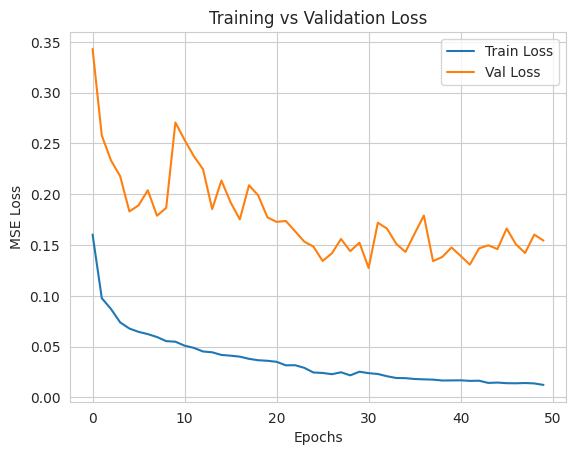

In [ ]:
def plot_losses(train_losses, val_losses, model_name="Model"):
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")
    plt.show()

plot_losses(gru_train_losses, gru_val_losses, model_name="GRU Model")


GRU Model Validation Loss: 0.1544


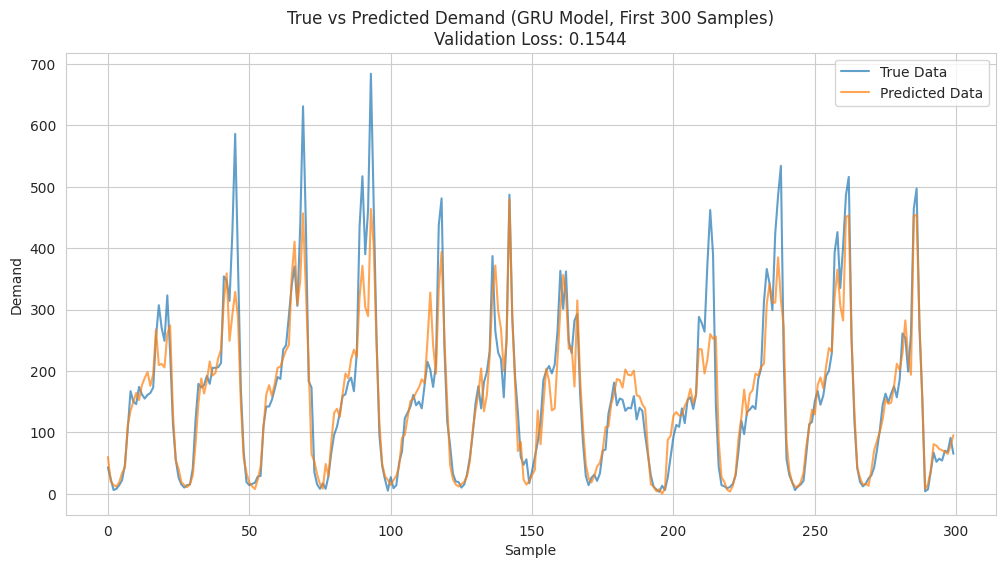

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def evaluate_model(model, val_loader, scaler_y, model_name="Model"):
    model.eval()
    criterion = nn.MSELoss()

    test_preds = []
    test_labels = []

    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X = batch_X.to(device)
            preds = model(batch_X)
            test_preds.append(preds.cpu())
            test_labels.append(batch_y.cpu())

    test_preds = torch.cat(test_preds, dim=0)
    test_labels = torch.cat(test_labels, dim=0)

    test_loss = criterion(test_preds, test_labels.unsqueeze(1))
    print(f'{model_name} Validation Loss: {test_loss.item():.4f}')

    # Inverse transform the predictions and labels
    test_preds_np = scaler_y.inverse_transform(test_preds.numpy().reshape(-1, 1)).flatten()
    test_labels_np = scaler_y.inverse_transform(test_labels.numpy().reshape(-1, 1)).flatten()

    subset_size = 300
    test_preds_subset = test_preds_np[:subset_size]
    test_labels_subset = test_labels_np[:subset_size]

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(test_labels_subset)), test_labels_subset, label='True Data', alpha=0.7)
    plt.plot(range(len(test_preds_subset)), test_preds_subset, label='Predicted Data', alpha=0.7)
    plt.legend()
    plt.xlabel('Sample')
    plt.ylabel('Demand')
    plt.title(f'True vs Predicted Demand ({model_name}, First {subset_size} Samples)\nValidation Loss: {test_loss.item():.4f}')
    plt.show()


evaluate_model(gru_model, val_loader, scaler_y, model_name="GRU Model")

In [ ]:
with open("lstm_model.pkl", "wb") as f:
    pickle.dump(lstm_model.state_dict(), f)

with open("gru.pkl", "wb") as f:
    pickle.dump(gru_model.state_dict(), f)